In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('S&P5001.xlsx')
num=12#特征数量len(data)
data.tail()

#标签数量

,Date,Return1,Return2,Return3,Return4,Return5,Return6,Return7,Return8,Return9,Return10,Return11,Return12,bear Market
694,2018-10-01,2.808260,0.983162,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,0
695,2018-11-01,0.983162,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,0
696,2018-12-01,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,0
697,2019-01-01,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,7.868440,0
698,2019-02-01,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,7.868440,2.972893,0


In [38]:
data1=data.iloc[:,1:]
data1.tail()

,Return1,Return2,Return3,Return4,Return5,Return6,Return7,Return8,Return9,Return10,Return11,Return12,bear Market
694,2.808260,0.983162,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,0
695,0.983162,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,0
696,5.617872,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,0
697,-3.894738,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,7.868440,0
698,-2.688451,0.271880,2.160835,0.484240,3.602159,3.026322,0.429430,-6.940336,1.785938,-9.177696,7.868440,2.972893,0


In [39]:
long1=700
long2=560
X=data1.iloc[0:long1,0:num]
y=data1.iloc[0:long1,num:num+1]
print(X.tail(),y.tail())

      Return1   Return2   Return3   Return4   Return5   Return6   Return7  \
694  2.808260  0.983162  5.617872 -3.894738 -2.688451  0.271880  2.160835   
695  0.983162  5.617872 -3.894738 -2.688451  0.271880  2.160835  0.484240   
696  5.617872 -3.894738 -2.688451  0.271880  2.160835  0.484240  3.602159   
697 -3.894738 -2.688451  0.271880  2.160835  0.484240  3.602159  3.026322   
698 -2.688451  0.271880  2.160835  0.484240  3.602159  3.026322  0.429430   

      Return8   Return9  Return10  Return11  Return12  
694  0.484240  3.602159  3.026322  0.429430 -6.940336  
695  3.602159  3.026322  0.429430 -6.940336  1.785938  
696  3.026322  0.429430 -6.940336  1.785938 -9.177696  
697  0.429430 -6.940336  1.785938 -9.177696  7.868440  
698 -6.940336  1.785938 -9.177696  7.868440  2.972893        bear Market
694            0
695            0
696            0
697            0
698            0


In [16]:
X_train, X_test=X.iloc[0:long2],X.iloc[long2:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[0:long2],y.iloc[long2:]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size) 

6720
1668
560
139


In [17]:
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
#X=X.values#将Pandas中的dataframe转成numpy中的array，（转化成数组）才能进行多元线性回归的计算
#y=y.values

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


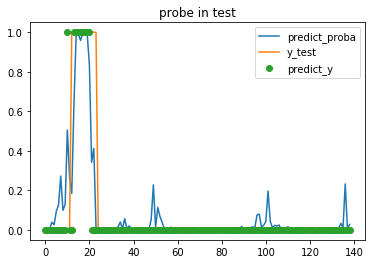

In [18]:
#测试集概率对比
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train, y_train)
predicttest=logit.predict_proba(X_test)[:,1]
plt.plot(predicttest)
plt.plot(y_test)
plt.plot(logit.predict(X_test),'o')

plt.legend(('predict_proba', 'y_test','predict_y'),loc='upper right')
plt.title('probe in test')
plt.show()

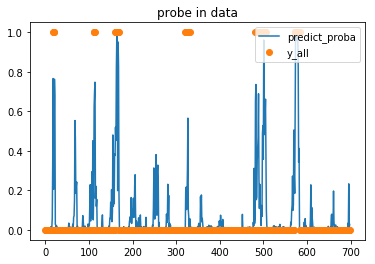

In [19]:
#在数据集的表现
preall=logit.predict_proba(X)[:,1]
plt.plot(preall)
plt.plot(y,'o')

plt.legend(('predict_proba', 'y_all'),loc='upper right')
plt.title('probe in data')
plt.show()

In [20]:
#精确率
score = logit.score(X_train, y_train)
score2 = logit.score(X_test, y_test)

print("mean accuracy on the given test data and labels")
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

mean accuracy on the given test data and labels
Training set accuracy:  0.957
Test set accuracy:  0.964


No handles with labels found to put in legend.


系数coef_: [[ 0.02120651 -0.04256892 -0.09456562 -0.07873354 -0.11680453 -0.15395474
  -0.19943434 -0.24830049 -0.17224563 -0.20022766 -0.14988586 -0.27821511]]
截距intercept_: [-3.51374856]


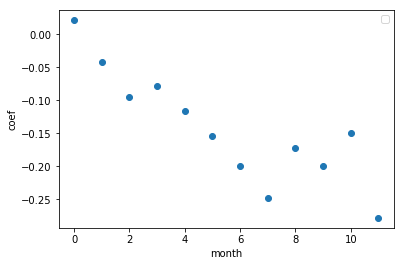

In [40]:
print("系数coef_: {}".format(logit.coef_[:]))#求出的权重w
print("截距intercept_: {}".format(logit.intercept_))#求出的截距b
#plt.plot(len(lr.coef_),lr.coef_, 'r', label='wight')
#plt.legend()
#plt.show()
plt.plot(logit.coef_[0,:], 'o')
plt.xlabel("month")
plt.ylabel("coef")
plt.legend()

In [42]:
pre01=logit.predict(X)
res=pd.Series(preall)
pre01se=pd.Series(pre01)
res1=pd.DataFrame({'res': res})
pre01df=pd.DataFrame({'res01': pre01se})
dataf=pd.concat([data, res1,pre01df],axis=1)

In [43]:
dataf.to_csv('res')


In [45]:
dataf

,Date,Return1,Return2,Return3,Return4,Return5,Return6,Return7,Return8,Return9,Return10,Return11,Return12,bear Market,res,res01
0,1960-12-01,-7.146435,0.917101,-1.389879,-1.752801,2.685304,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,0,0.006655,0
1,1961-01-01,0.917101,-1.389879,-1.752801,2.685304,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,0,0.003819,0
2,1961-02-01,-1.389879,-1.752801,2.685304,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,0,0.002379,0
3,1961-03-01,-1.752801,2.685304,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0,0.000779,0
4,1961-04-01,2.685304,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,0,0.001073,0
5,1961-05-01,1.952355,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,1.913949,0,0.000416,0
6,1961-06-01,-2.477161,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,1.913949,-2.884615,0,0.002030,0
7,1961-07-01,2.612142,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,1.913949,-2.884615,3.279703,0,0.000818,0
8,1961-08-01,-6.039326,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,1.913949,-2.884615,3.279703,1.962253,0,0.000985,0
9,1961-09-01,-0.242900,4.026971,4.627296,6.315608,2.686954,2.553594,0.384261,1.913949,-2.884615,3.279703,1.962253,-1.968562,0,0.003048,0


In [44]:
logit.score(X, y)

0.9585121602288984

In [56]:
zhaohuilv=dataf.loc[dataf['bear Market']==1]
zhaohuilv

,Date,Return1,Return2,Return3,Return4,Return5,Return6,Return7,Return8,Return9,Return10,Return11,Return12,bear Market,res,res01
17,1962-05-01,-2.884615,3.279703,1.962253,-1.968562,2.832309,3.934713,0.322490,-3.787561,1.626961,-0.586049,-6.196981,-8.599019,1,0.343612,0
20,1962-08-01,-1.968562,2.832309,3.934713,0.322490,-3.787561,1.626961,-0.586049,-6.196981,-8.599019,-8.183800,6.356164,1.528422,1,0.381264,0
21,1962-09-01,2.832309,3.934713,0.322490,-3.787561,1.626961,-0.586049,-6.196981,-8.599019,-8.183800,6.356164,1.528422,-4.820704,1,0.762566,1
111,1970-03-01,2.147572,-0.221815,-5.557703,-6.017808,4.007405,-2.502356,4.424399,-3.527355,-1.865473,-7.647187,5.269348,0.145251,1,0.178510,0
112,1970-04-01,-0.221815,-5.557703,-6.017808,4.007405,-2.502356,4.424399,-3.527355,-1.865473,-7.647187,5.269348,0.145251,-9.048310,1,0.624156,1
113,1970-05-01,-5.557703,-6.017808,4.007405,-2.502356,4.424399,-3.527355,-1.865473,-7.647187,5.269348,0.145251,-9.048310,-6.096663,1,0.701702,1
161,1974-05-01,-0.657456,3.798197,-3.668453,4.009592,-0.129116,-11.386093,1.656940,-1.004613,-0.362431,-2.327998,-3.905086,-3.355110,1,0.519036,1
162,1974-06-01,3.798197,-3.668453,4.009592,-0.129116,-11.386093,1.656940,-1.004613,-0.362431,-2.327998,-3.905086,-3.355110,-1.466544,1,0.453373,0
163,1974-07-01,-3.668453,4.009592,-0.129116,-11.386093,1.656940,-1.004613,-0.362431,-2.327998,-3.905086,-3.355110,-1.466544,-7.779070,1,0.815536,1
164,1974-08-01,4.009592,-0.129116,-11.386093,1.656940,-1.004613,-0.362431,-2.327998,-3.905086,-3.355110,-1.466544,-7.779070,-9.027865,1,0.975381,1


In [64]:
aaa=zhaohuilv.sum()
aaa

Return1         -7.195772
Return2        -38.626312
Return3        -72.622044
Return4        -51.890619
Return5        -73.244586
Return6        -96.914874
Return7       -142.468559
Return8       -142.944668
Return9       -102.294814
Return10       -85.436170
Return11       -93.223001
Return12      -153.868707
bear Market     47.000000
res             25.637664
res01           24.000000
dtype: float64

In [68]:
recall=aaa['res01']/aaa['bear Market']
recall


0.5106382978723404

In [ ]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test = ss.transform(X_test)       #数据标准化
X_test